In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
#print(os.listdir("../input"))

In [ ]:
data = pd.read_csv('/content/UCI_Credit_Card.csv')
data.sample(5)

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
9053    9054   130000.0    1  ...     390.0     390.0                           0
15133  15134   240000.0    1  ...    7023.0   10005.0                           0
27718  27719    90000.0    2  ...    7200.0       0.0                           1
24902  24903   360000.0    1  ...    7127.0    1193.0                           0
21098  21099   270000.0    1  ...    2000.0    2000.0                           0

[5 rows x 25 columns]

In [ ]:
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
data.drop('ID', axis = 1, inplace =True) # drop column "ID"
data.info()

In [ ]:
y = data.Default
features = data.drop('Default', axis = 1, inplace = False)

In [ ]:
X = data.drop('Default', axis=1)  
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

# Models

##DT

In [ ]:
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}


In [ ]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))


Accuracy: 0.808


##RF

In [ ]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))


Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 6, 'criterion': 'gini'}


In [ ]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

Accuracy: 0.8171666666666667


##XG

In [ ]:
# Create the random grid
param_dist = {
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

xg = XGBClassifier()

xg_cv = RandomizedSearchCV(xg, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

xg_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (xg_cv.best_params_))


Tuned Random Forest Parameters: {'max_features': 9, 'max_depth': 5, 'criterion': 'gini'}


In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
Xg = XGBClassifier(criterion= 'gini', max_depth= 5, 
                                     max_features= 9,
                                     random_state=0)
Xg.fit(X_train, y_train)
y_pred = Xg.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

Accuracy: 0.8188333333333333


In [ ]:
y_train

22788    0
29006    0
16950    0
22280    1
11346    0
        ..
23479    1
13921    0
3794     0
27565    0
27126    0
Name: Default, Length: 24000, dtype: int64

#INTERPRETABILITY

In [ ]:
pip install lime

     |████████████████████████████████| 275 kB 5.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c765289602b1650a1ab7252dbaa35a93d4f20294624012b25c395728a558f554
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:

import lime
import lime.lime_tabular

##Xg, cols shuffled, hence reallocated

In [ ]:
X = data.drop('Default', axis=1)  
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

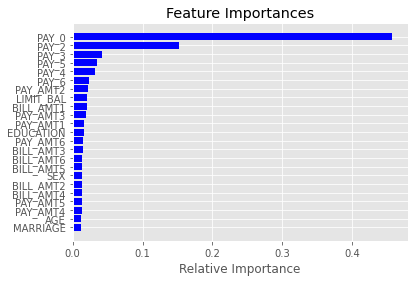

In [ ]:
importances = Xg.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
explainer= LimeTabularExplainer(training_data=np.array(X_train),
                                class_names=['Default','No default'],
                                mode='classification', 
                                feature_names=list(X_train.columns),
                                training_labels=(y_train),
                                random_state=12)

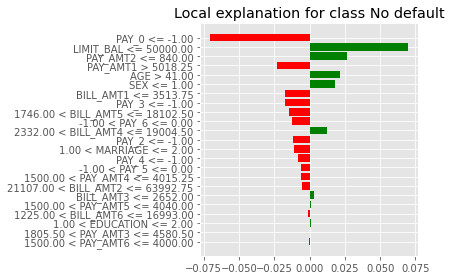

In [ ]:
exp = explainer.explain_instance(X_test.iloc[0], Xg.predict_proba, num_features=23)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

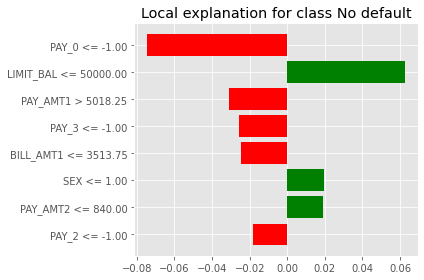

In [ ]:
exp = explainer.explain_instance(X_test.iloc[0], Xg.predict_proba, num_features=8)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
x_test_test = X_test.values

In [ ]:
predict_fn_dt = lambda x: Xg.predict_proba(x).astype(float)

In [ ]:
feature_names = (X_train.columns)


In [ ]:
feature_names.shape

(23,)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['Wont Default','Will Default'], verbose=False, mode='classification')


In [ ]:
choosen_instance = X.iloc[[2]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_dt, num_features=23)
exp.show_in_notebook(show_table=True)

##RF

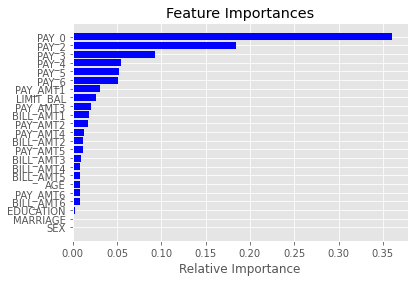

In [ ]:
importances = Ran.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
explainer= LimeTabularExplainer(training_data=np.array(X_train),
                                class_names=['Default','No default'],
                                mode='classification', 
                                feature_names=list(X_train.columns),
                                training_labels=(y_train),
                                random_state=12)

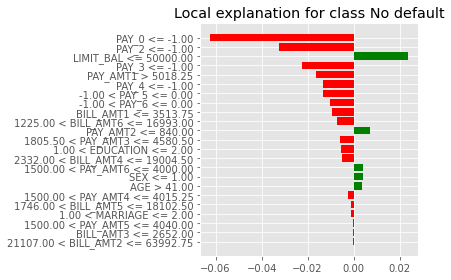

In [ ]:
exp = explainer.explain_instance(X_test.iloc[0], Ran.predict_proba, num_features=23)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

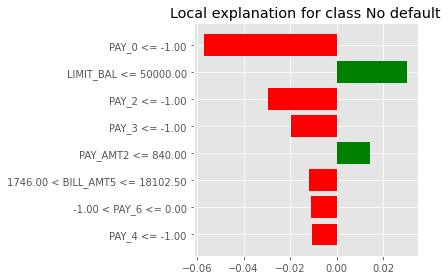

In [ ]:
exp = explainer.explain_instance(X_test.iloc[0], Ran.predict_proba, num_features=8)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
x_test_test = X_test.values

In [ ]:
predict_fn_dt = lambda x: Ran.predict_proba(x).astype(float)

In [ ]:
feature_names = (X_train.columns)


In [ ]:
feature_names.shape

(23,)

In [ ]:
choosen_instance = X.iloc[[100]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_dt, num_features=23)
exp.show_in_notebook(show_table=True)

##DT

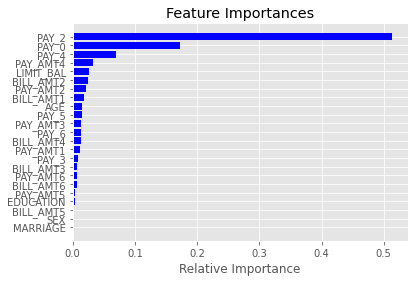

In [ ]:
importances = Tree.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
explainer= LimeTabularExplainer(training_data=np.array(X_train),
                                class_names=['Default','No default'],
                                mode='classification', 
                                feature_names=list(X_train.columns),
                                training_labels=(y_train),
                                random_state=12)

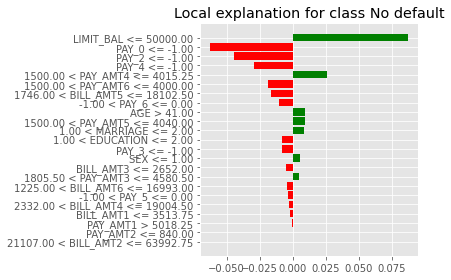

In [ ]:
exp = explainer.explain_instance(X_test.iloc[0], Tree.predict_proba, num_features=23)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

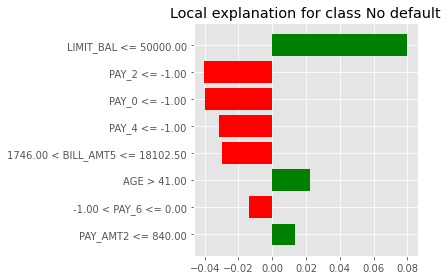

In [ ]:
exp = explainer.explain_instance(X_test.iloc[0], Tree.predict_proba, num_features=8)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
predict_fn_dt1 = lambda x: Tree.predict_proba(x).astype(float)

In [ ]:
feature_names = (X_train.columns)


In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['Good','Default'], verbose=False, mode='classification')


In [ ]:
choosen_instance = X.iloc[[223]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_dt1, num_features=23)
exp.show_in_notebook(show_table=True)